In [12]:
import numpy as np 
import pandas as pd


import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Input, Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16
import pandas as pd
import numpy as np
import os
from numpy import argmax

PATH = "augmented_image"
data_dir_list = os.listdir(PATH)
data_dir_list

img_rows=224
img_cols=224
num_channel=3

num_epoch = 55
batch_size = 32


img_data_list = []
classes_names_list = []
target_column = []

for dataset in data_dir_list:
    if os.path.isdir(os.path.join(PATH, dataset)):  
        classes_names_list.append(dataset)
        print("Getting image from {} folder".format(dataset))
        img_list = os.listdir(os.path.join(PATH, dataset))
        for img in img_list:
            input_img = cv2.imread(os.path.join(PATH, dataset, img))
            input_img_resize = cv2.resize(input_img, (img_rows, img_cols))
            img_data_list.append(input_img_resize)
            target_column.append(dataset)
    else:
        print("'{}' is not a directory, skipping.".format(dataset))

num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) 
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape 
print("number of samples",num_of_samples)
print("target column before encoding",target_column)

Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

target_column

target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)



from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, num_channel))


for layer in vgg_model.layers:
    layer.trainable = False


model = Sequential()


model.add(vgg_model)


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))


score = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


Getting image from strabismus folder
'.DS_Store' is not a directory, skipping.
Getting image from normal folder
num_classes 2
Shape of image data (435, 224, 224, 3)
number of samples 435
target column before encoding ['strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus'

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 25088)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 2)                 258       
                                                                 
Total params: 17926338 (68.38 MB)
Trainable params: 3211650 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 

Getting image from strabismus folder
'.DS_Store' is not a directory, skipping.
Getting image from normal folder
num_classes 2
Shape of image data (435, 224, 224, 3)
number of samples 435
target column before encoding ['strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus', 'strabismus'

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 17926338 (68.38 MB)
Trainable params: 3211650 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1

3/3 [==============================] - 2s 708ms/step


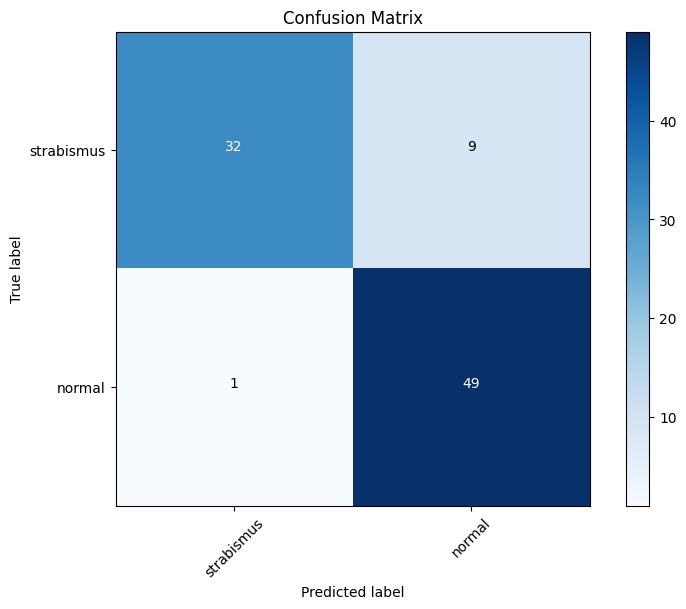

In [5]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Input, Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16

PATH = "augmented_image"
data_dir_list = os.listdir(PATH)

img_rows = 224
img_cols = 224
num_channel = 3
num_epoch = 55
batch_size = 64

img_data_list = []
classes_names_list = []
target_column = []

for dataset in data_dir_list:
    if os.path.isdir(os.path.join(PATH, dataset)):  
        classes_names_list.append(dataset)
        print("Getting image from {} folder".format(dataset))
        img_list = os.listdir(os.path.join(PATH, dataset))
        for img in img_list:
            input_img = cv2.imread(os.path.join(PATH, dataset, img))
            input_img_resize = cv2.resize(input_img, (img_rows, img_cols))
            img_data_list.append(input_img_resize)
            target_column.append(dataset)
    else:
        print("'{}' is not a directory, skipping.".format(dataset))

num_classes = len(classes_names_list)
print("num_classes", num_classes)
img_data = np.array(img_data_list) 
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data", img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape 
print("number of samples", num_of_samples)
print("target column before encoding", target_column)

Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

target_column_hotcoded = to_categorical(target_column, num_classes)
X, Y = shuffle(img_data, target_column_hotcoded, random_state=2)
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=2)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=2)

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, num_channel))

for layer in vgg_model.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))


score = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)


plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes_names_list))
plt.xticks(tick_marks, classes_names_list, rotation=45)
plt.yticks(tick_marks, classes_names_list)
for i in range(len(classes_names_list)):
    for j in range(len(classes_names_list)):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
